# Minimum wage data

This script is not an analysis in it's current form. Instead it's a transformation which accomplishes the following:

Create charts for each state's historical changes in minimum wage versus the federal minimum wage from 1974 on. Multiple width versions are generated for each state for HTML5 picture element optimiziation.

Create a single CSV summarizing the above trends for a visualization in the viz folder.



In [1]:
import pandas as pd

In [2]:
fed = pd.read_excel("data/VZ_federal_changes.xlsx")
state = pd.read_excel("data/VZ_state_annual.xlsx")
sub = pd.read_excel("data/VZ_substate_annual.xlsx")

In [3]:
fed

year  month  day       date  Federal Minimum Wage  \
0   1974      5    1  01may1974                  2.00   
1   1975      1    1  01jan1975                  2.10   
2   1976      1    1  01jan1976                  2.30   
3   1978      1    1  01jan1978                  2.65   
4   1979      1    1  01jan1979                  2.90   
5   1980      1    1  01jan1980                  3.10   
6   1981      1    1  01jan1981                  3.35   
7   1990      4    1  01apr1990                  3.80   
8   1991      4    1  01apr1991                  4.25   
9   1996     10    1  01oct1996                  4.75   
10  1997      9    1  01sep1997                  5.15   
11  2007      7   24  24jul2007                  5.85   
12  2008      7   24  24jul2008                  6.55   
13  2009      7   24  24jul2009                  7.25   
14  2016      7    1  01jul2016                  7.25   

                                               source  
0   Federal - DOL - Historical Minimum Wage Change...  
1   Federal - DOL - Historical Minimum Wage Change...  
2   Federal - DOL - Historical Minimum Wage Change...  
3   Federal - DOL - Historical Minimum Wage Change...  
4   Federal - DOL - Historical Minimum Wage Change...  
5   Federal - DOL - Historical Minimum Wage Change...  
6   Federal - DOL - Historical Minimum Wage Change...  
7   Federal - DOL - Historical Minimum Wage Change...  
8   Federal - DOL - Historical Minimum Wage Change...  
9   Federal - DOL - Historical Minimum Wage Change...  
10  Federal - DOL - Historical Minimum Wage Change...  
11  Federal - DOL - Historical Minimum Wage Change...  
12  Federal - DOL - Historical Minimum Wage Change...  
13  Federal - DOL - Historical Minimum Wage Change...  
14                                            CURRENT

In [4]:
state

State FIPS Code     Name State Abbreviation  Year  \
0                   2   Alaska                 AK  1974   
1                   2   Alaska                 AK  1975   
2                   2   Alaska                 AK  1976   
3                   2   Alaska                 AK  1977   
4                   2   Alaska                 AK  1978   
5                   2   Alaska                 AK  1979   
6                   2   Alaska                 AK  1980   
7                   2   Alaska                 AK  1981   
8                   2   Alaska                 AK  1982   
9                   2   Alaska                 AK  1983   
10                  2   Alaska                 AK  1984   
11                  2   Alaska                 AK  1985   
12                  2   Alaska                 AK  1986   
13                  2   Alaska                 AK  1987   
14                  2   Alaska                 AK  1988   
15                  2   Alaska                 AK  1989   
16                  2   Alaska                 AK  1990   
17                  2   Alaska                 AK  1991   
18                  2   Alaska                 AK  1992   
19                  2   Alaska                 AK  1993   
20                  2   Alaska                 AK  1994   
21                  2   Alaska                 AK  1995   
22                  2   Alaska                 AK  1996   
23                  2   Alaska                 AK  1997   
24                  2   Alaska                 AK  1998   
25                  2   Alaska                 AK  1999   
26                  2   Alaska                 AK  2000   
27                  2   Alaska                 AK  2001   
28                  2   Alaska                 AK  2002   
29                  2   Alaska                 AK  2003   
...               ...      ...                ...   ...   
2163               56  Wyoming                 WY  1987   
2164               56  Wyoming                 WY  1988   
2165               56  Wyoming                 WY  1989   
2166               56  Wyoming                 WY  1990   
2167               56  Wyoming                 WY  1991   
2168               56  Wyoming                 WY  1992   
2169               56  Wyoming                 WY  1993   
2170               56  Wyoming                 WY  1994   
2171               56  Wyoming                 WY  1995   
2172               56  Wyoming                 WY  1996   
2173               56  Wyoming                 WY  1997   
2174               56  Wyoming                 WY  1998   
2175               56  Wyoming                 WY  1999   
2176               56  Wyoming                 WY  2000   
2177               56  Wyoming                 WY  2001   
2178               56  Wyoming                 WY  2002   
2179               56  Wyoming                 WY  2003   
2180               56  Wyoming                 WY  2004   
2181               56  Wyoming                 WY  2005   
2182               56  Wyoming                 WY  2006   
2183               56  Wyoming                 WY  2007   
2184               56  Wyoming                 WY  2008   
2185               56  Wyoming                 WY  2009   
2186               56  Wyoming                 WY  2010   
2187               56  Wyoming                 WY  2011   
2188               56  Wyoming                 WY  2012   
2189               56  Wyoming                 WY  2013   
2190               56  Wyoming                 WY  2014   
2191               56  Wyoming                 WY  2015   
2192               56  Wyoming                 WY  2016   

      Annual Federal Minimum  Annual State Minimum  Annual Federal Average  \
0                       2.00                  2.50                2.000000   
1                       2.10                  2.60                2.100000   
2                       2.30                  2.80                2.300000   
3                       2.30       

In [5]:
from uscpi import UsCpi
cpi = UsCpi()

def inflate (amt, year_from, year_to):
    return cpi.value_with_inflation(amt, year_from, year_to)

def dollars_2014 (amt, year_from):
    return inflate(amt, year_from, 2014)

def dollars_2016 (amt, year_from):
    return inflate(amt, year_from, 2016)

In [6]:
# check that fed min is always equal to fed max
state[state["Annual Federal Maximum"] != state["Annual Federal Minimum"]]

State FIPS Code           Name State Abbreviation  Year  \
16                  2         Alaska                 AK  1990   
17                  2         Alaska                 AK  1991   
22                  2         Alaska                 AK  1996   
23                  2         Alaska                 AK  1997   
33                  2         Alaska                 AK  2007   
34                  2         Alaska                 AK  2008   
35                  2         Alaska                 AK  2009   
59                  1        Alabama                 AL  1990   
60                  1        Alabama                 AL  1991   
65                  1        Alabama                 AL  1996   
66                  1        Alabama                 AL  1997   
76                  1        Alabama                 AL  2007   
77                  1        Alabama                 AL  2008   
78                  1        Alabama                 AL  2009   
102                 5       Arkansas                 AR  1990   
103                 5       Arkansas                 AR  1991   
108                 5       Arkansas                 AR  1996   
109                 5       Arkansas                 AR  1997   
119                 5       Arkansas                 AR  2007   
120                 5       Arkansas                 AR  2008   
121                 5       Arkansas                 AR  2009   
145                 4        Arizona                 AZ  1990   
146                 4        Arizona                 AZ  1991   
151                 4        Arizona                 AZ  1996   
152                 4        Arizona                 AZ  1997   
162                 4        Arizona                 AZ  2007   
163                 4        Arizona                 AZ  2008   
164                 4        Arizona                 AZ  2009   
188                 6     California                 CA  1990   
189                 6     California                 CA  1991   
...               ...            ...                ...   ...   
2012               50        Vermont                 VT  2008   
2013               50        Vermont                 VT  2009   
2037               53     Washington                 WA  1990   
2038               53     Washington                 WA  1991   
2043               53     Washington                 WA  1996   
2044               53     Washington                 WA  1997   
2054               53     Washington                 WA  2007   
2055               53     Washington                 WA  2008   
2056               53     Washington                 WA  2009   
2080               55      Wisconsin                 WI  1990   
2081               55      Wisconsin                 WI  1991   
2086               55      Wisconsin                 WI  1996   
2087               55      Wisconsin                 WI  1997   
2097               55      Wisconsin                 WI  2007   
2098               55      Wisconsin                 WI  2008   
2099               55      Wisconsin                 WI  2009   
2123               54  West Virginia                 WV  1990   
2124               54  West Virginia                 WV  1991   
2129               54  West Virginia                 WV  1996   
2130               54  West Virginia                 WV  1997   
2140               54  West Virginia                 WV  2007   
2141               54  West Virginia                 WV  2008   
2142               54  West Virginia                 WV  2009   
2166               56        Wyoming                 WY  1990   
2167               56        Wyoming                 WY  1991   
2172               56        Wyoming                 WY  1996   
2173               56        Wyoming                 WY  1997   
2183               56        Wyoming                 WY  2007   
2184               56        Wyoming                 WY  2008   
2185               56        Wyoming     

In [7]:
def get_state(abbr):
    df = state[state["State Abbreviation"] == abbr]
    
    def adjust(amt, year):
        # Can't adjust past 2014
        if year <= 2016:
            return dollars_2016(amt, year)
        return None
    
    df = df[["State Abbreviation","Year","Annual Federal Minimum","Annual State Minimum"]]
    df["fed_adj"] = df.apply(lambda x: adjust(x["Annual Federal Minimum"],x["Year"]), axis=1)
    df["state_adj"] = df.apply(lambda x: adjust(x["Annual State Minimum"],x["Year"]), axis=1)

    return df

get_state("CT")

State Abbreviation  Year  Annual Federal Minimum  Annual State Minimum  \
258                 CT  1974                    2.00                  2.01   
259                 CT  1975                    2.10                  2.10   
260                 CT  1976                    2.30                  2.30   
261                 CT  1977                    2.30                  2.31   
262                 CT  1978                    2.65                  2.66   
263                 CT  1979                    2.90                  2.91   
264                 CT  1980                    3.10                  3.12   
265                 CT  1981                    3.35                  3.37   
266                 CT  1982                    3.35                  3.37   
267                 CT  1983                    3.35                  3.37   
268                 CT  1984                    3.35                  3.37   
269                 CT  1985                    3.35                  3.37   
270                 CT  1986                    3.35                  3.37   
271                 CT  1987                    3.35                  3.37   
272                 CT  1988                    3.35                  3.75   
273                 CT  1989                    3.35                  4.25   
274                 CT  1990                    3.35                  4.25   
275                 CT  1991                    3.80                  4.25   
276                 CT  1992                    4.25                  4.27   
277                 CT  1993                    4.25                  4.27   
278                 CT  1994                    4.25                  4.27   
279                 CT  1995                    4.25                  4.27   
280                 CT  1996                    4.25                  4.27   
281                 CT  1997                    4.75                  4.77   
282                 CT  1998                    5.15                  5.18   
283                 CT  1999                    5.15                  5.65   
284                 CT  2000                    5.15                  6.15   
285                 CT  2001                    5.15                  6.40   
286                 CT  2002                    5.15                  6.70   
287                 CT  2003                    5.15                  6.90   
288                 CT  2004                    5.15                  7.10   
289                 CT  2005                    5.15                  7.10   
290                 CT  2006                    5.15                  7.40   
291                 CT  2007                    5.15                  7.65   
292                 CT  2008                    5.85                  7.65   
293                 CT  2009                    6.55                  8.00   
294                 CT  2010                    7.25                  8.25   
295                 CT  2011                    7.25                  8.25   
296                 CT  2012                    7.25                  8.25   
297                 CT  2013                    7.25                  8.25   
298                 CT  2014                    7.25                  8.70   
299                 CT  2015                    7.25                  9.15   
300                 CT  2016                    7.25                  9.60   

     fed_adj  state_adj  
258     9.71       9.76  
259     9.34       9.34  
260     9.67       9.67  
261     9.08       9.12  
262     9.73       9.76  
263     9.56       9.59  
264     9.00       9.06  
265     8.82       8.87  
266     8.31       8.36  
267     8.05       8.10  
268     7.71       7.76  
269     7.45       7.49  
270     7.31       7.36  
271     7.06       7.10  
272     6.78       7.58  
273     6.46       8.20  
274     6.13       7.78  
275     6.68       7.47  
276     7.25       7.28  
277     7.04       7.07  
278     6.86       6.89  

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.ticker import FuncFormatter


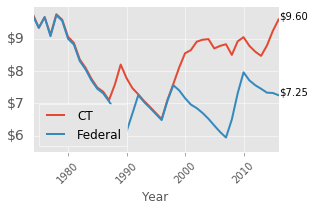

In [9]:
def money(x, pos=0):
    return "$" + str(x)

def df_for_plot(state):
    df = get_state(state)
    df = df[["Year","fed_adj","state_adj"]]
    df.columns="Year","Federal",state

    return df

state_df = state
def plot_st(state,width=200,height=200,show_legend=False,title=False,ext="_thumb"):
    #df = get_state(state)
    df = df_for_plot(state)
    state_name = state_df[state_df["State Abbreviation"] == state]["Name"].max()
    #df = df[["State Abbreviation","Year","fed_adj","state_adj"]].set_index("Year").reset_index()
    #df = pd.pivot_table(df, columns=["Year","state_adj"],index="State Abbreviation",values=["state_adj","fed_adj"]).reset_index()
    #df.plot()
    
    
    #df = df[["Year","fed_adj","state_adj"]]
    #df.columns="Year","Federal","State"
    
    max_val = int(round(max(df["Federal"].max(),
                  df[state].max())))

    min_val = int(round(min(df["Federal"].min(),
                           df[state].min())))
    
    
    
    
    p = pd.pivot_table(df,index="Year",).plot(
#         title=state_name,
        figsize=(width/96, height/96),
         legend=show_legend,
        linewidth=2.0,
        grid=None,
        yticks=range(min_val, max_val, 1),
        xticks=[1980,1990,2000,2010]
    )
    
    plt.setp(plt.xticks()[1], rotation=45)

    y = p.yaxis
    y.set_major_formatter(FuncFormatter(money))
    
    def label_pos(x, y, text,align="left",labelsize=14):
        p.annotate('{}'.format(text), 
                   xy=(x,y), 
                   xytext=(0, 0), 
                   ha=align,
                   textcoords='offset points',)
    
    fed_2016 = df[df["Year"] == 2016]["Federal"]    
    
    state_2016 = df[df["Year"] == 2016][state]
    label_pos(2016, 
              state_2016, 
              money("{0:.2f}".format(float(state_2016))))

    diff = abs(float(fed_2016) - float(state_2016))

    if diff > 1:
        label_pos(2016, 
                  fed_2016,
                  money("{0:.2f}".format(float(fed_2016))))


    plt.tight_layout()
    fig = p.get_figure()
    
    p.tick_params(
        axis="y",
        which="both",
        left="off",
        right="off",
        labelright="off",
        labelsize=14
    )
    
    p.tick_params(
        axis="x",
        which="both",
        top="off",
        right="off",
        labeltop="off"
    )


    fig.savefig("output/png/"  + state + "-" + str(width) + "x" + str(height)+'.png',
                transparent=True,
                bbox_inches='tight')
    
    # Sav three versions
    # thumbnail
    fig.savefig("viz/img/"  + state + "-" + str(width) + "x" + str(height)+'.png',
            transparent=True,
            bbox_inches='tight')

    #return df

plot_st("CT",
        width=400,
        height=300,
        show_legend=True)

/usr/local/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


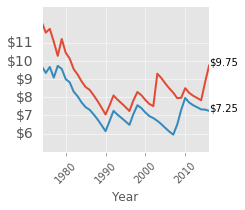

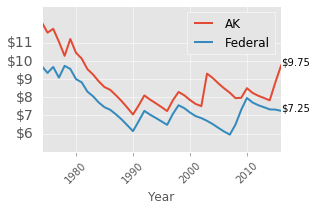

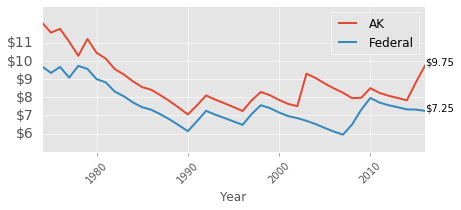

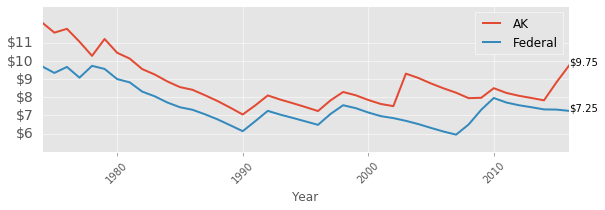

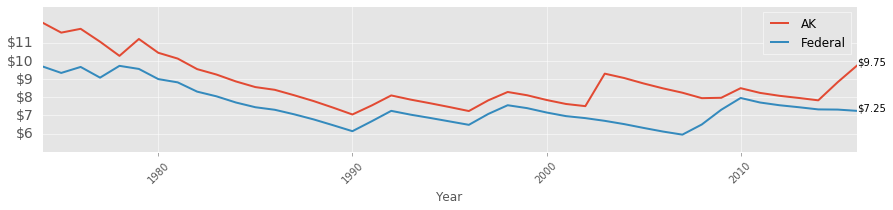

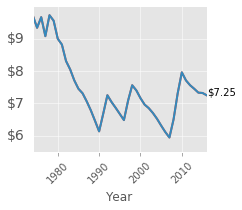

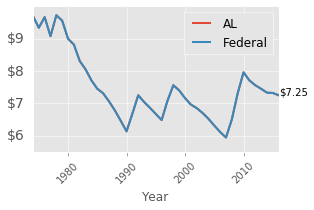

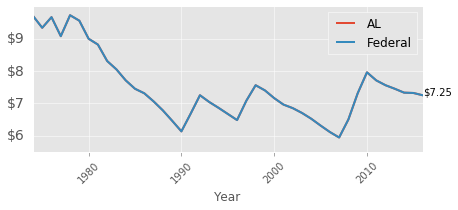

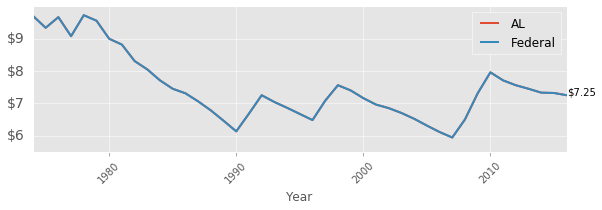

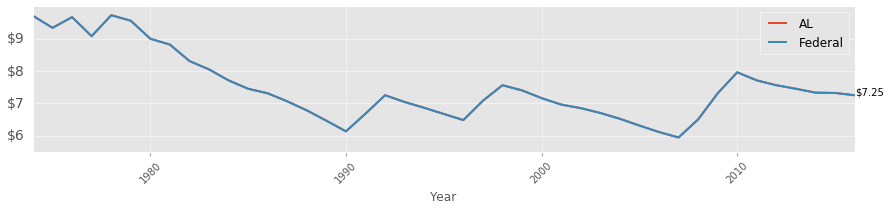

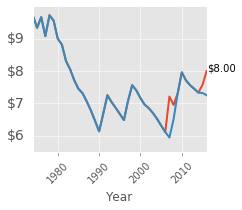

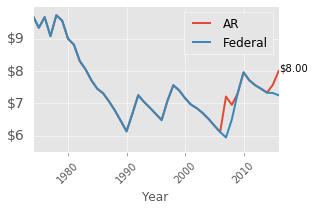

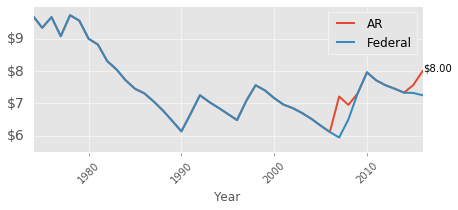

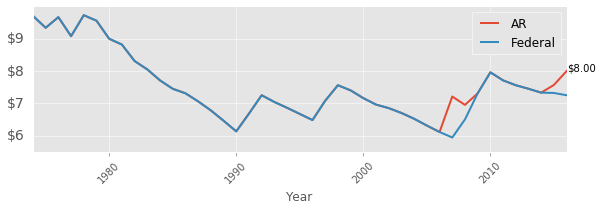

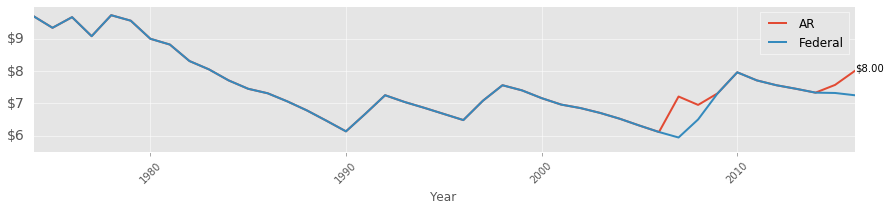

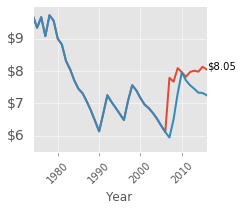

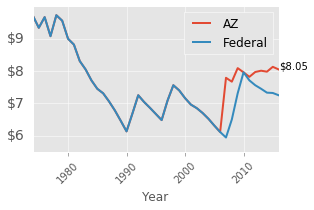

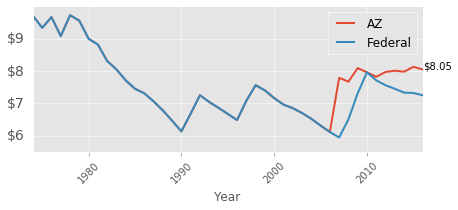

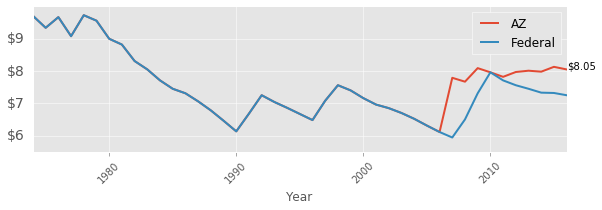

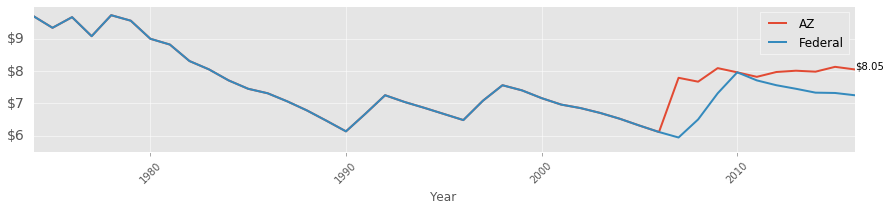

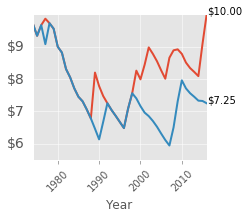

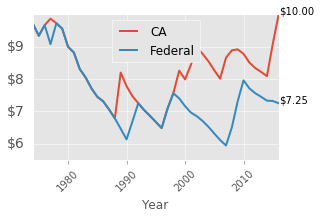

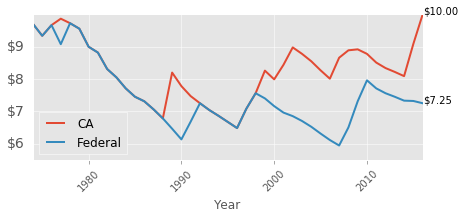

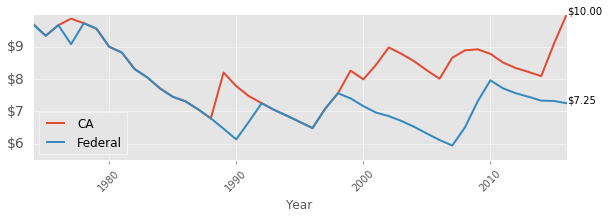

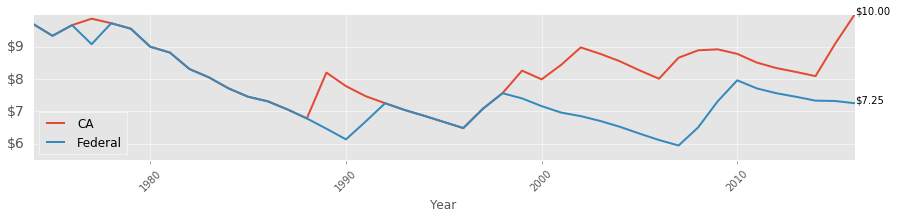

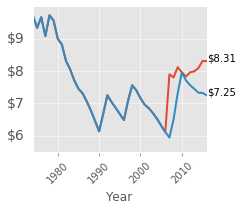

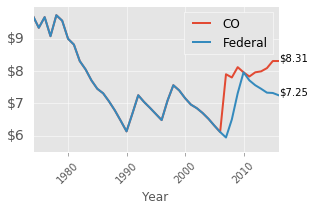

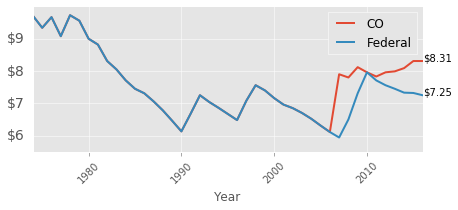

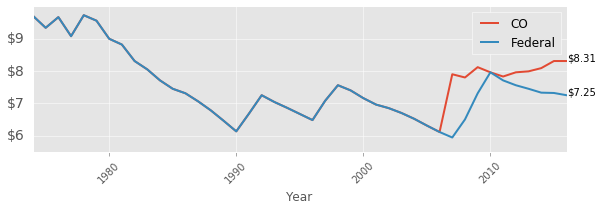

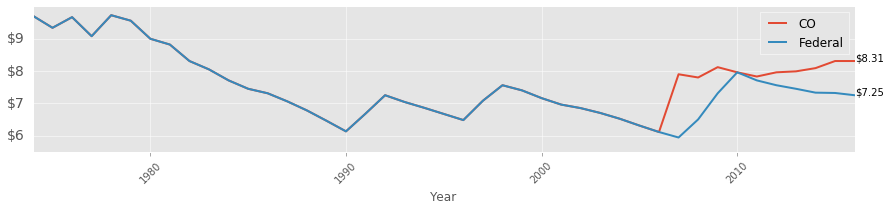

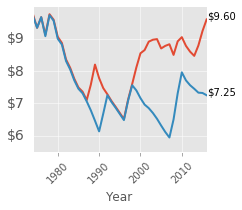

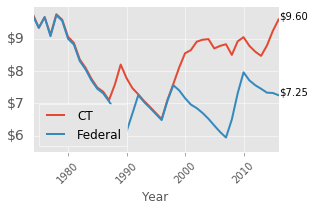

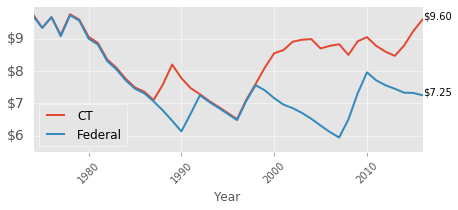

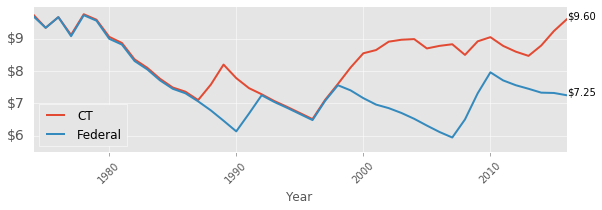

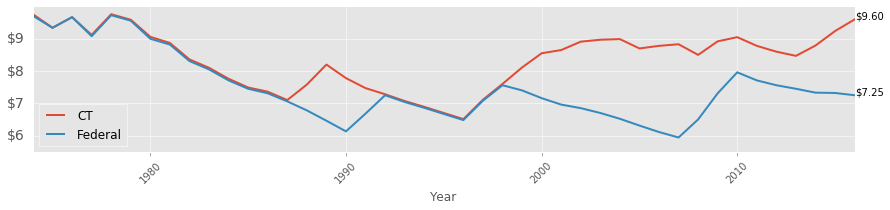

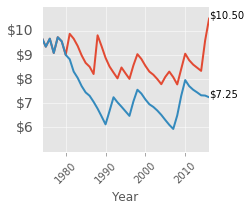

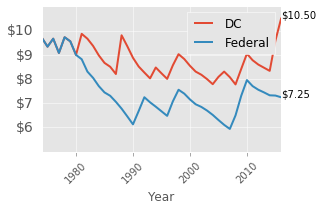

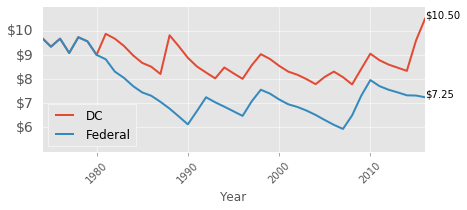

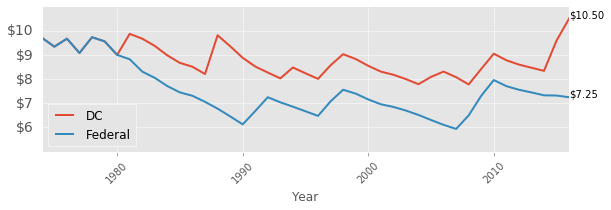

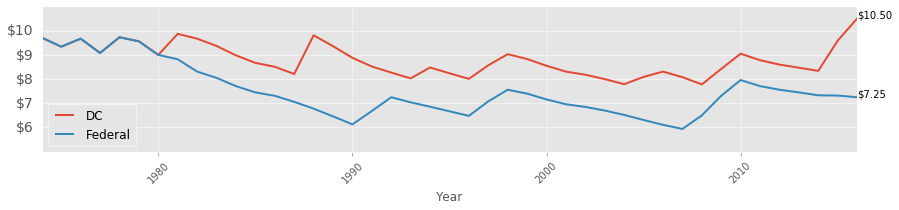

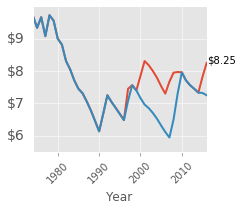

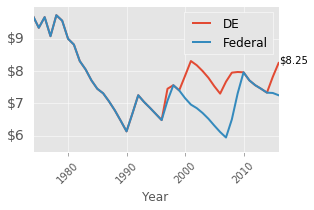

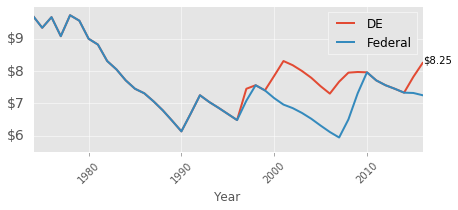

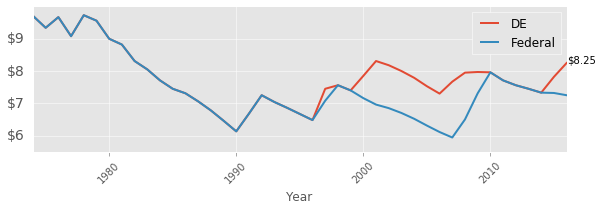

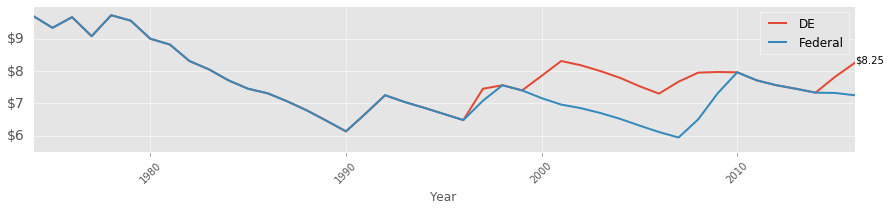

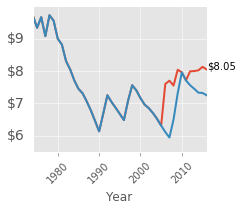

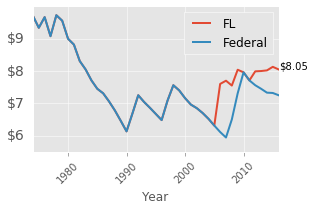

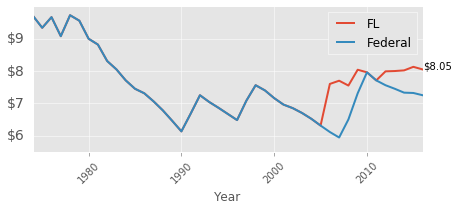

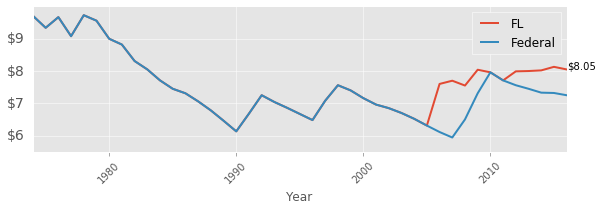

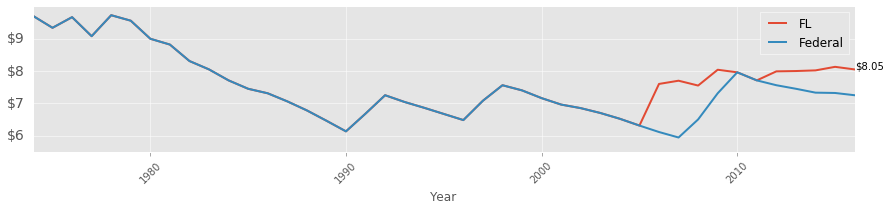

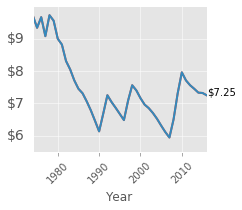

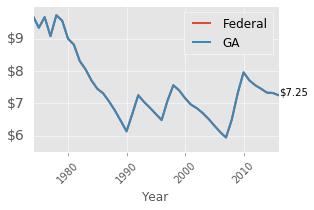

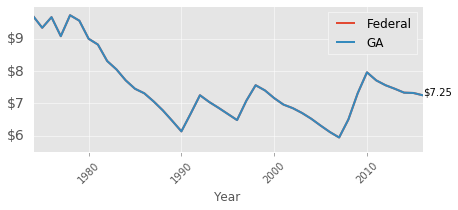

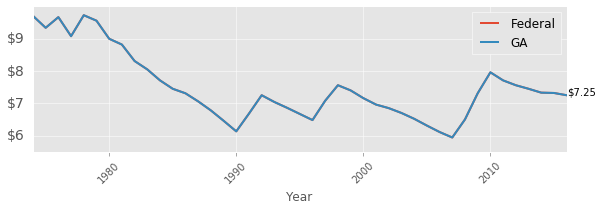

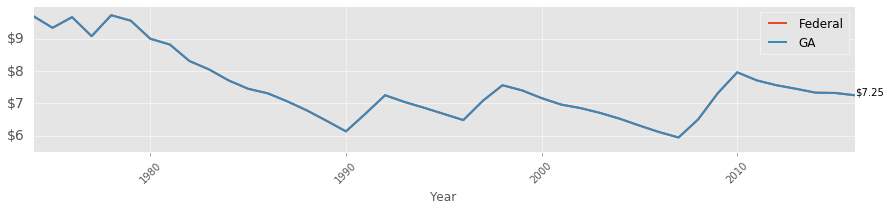

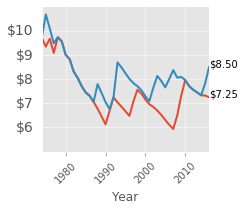

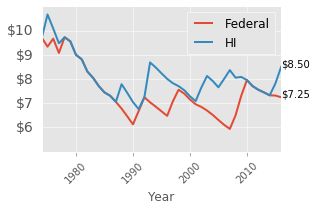

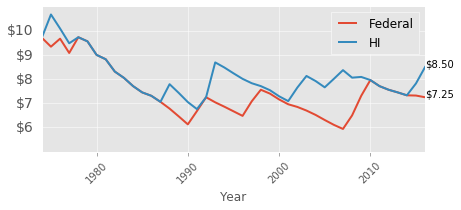

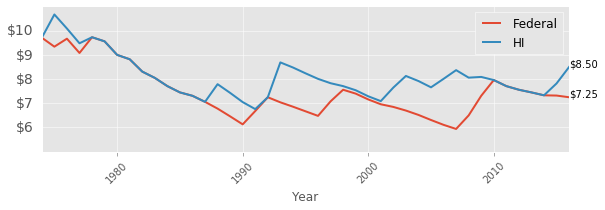

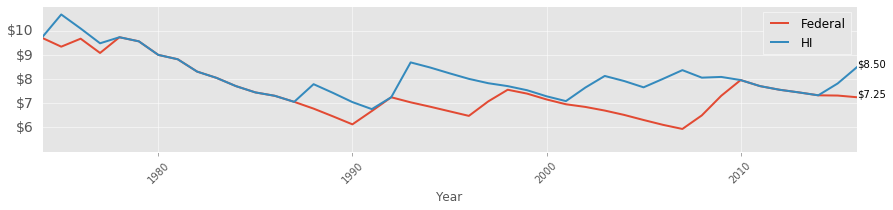

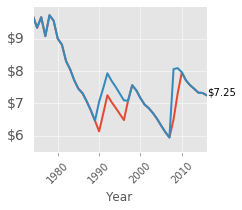

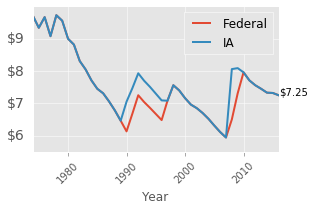

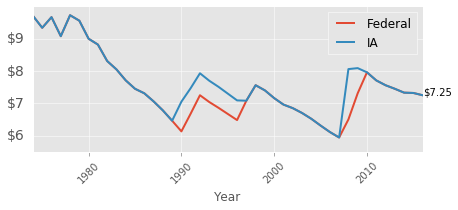

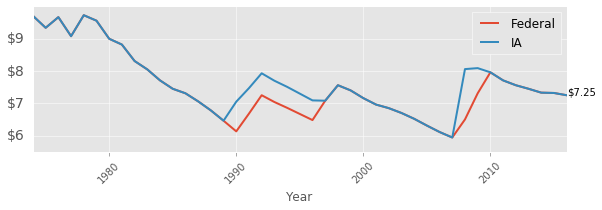

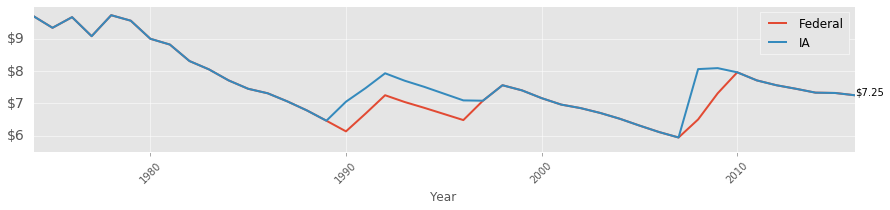

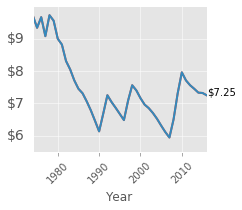

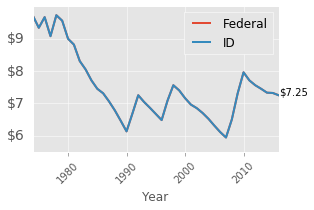

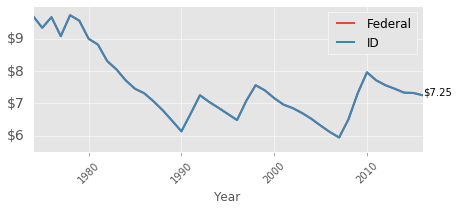

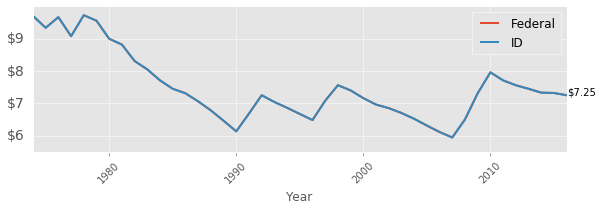

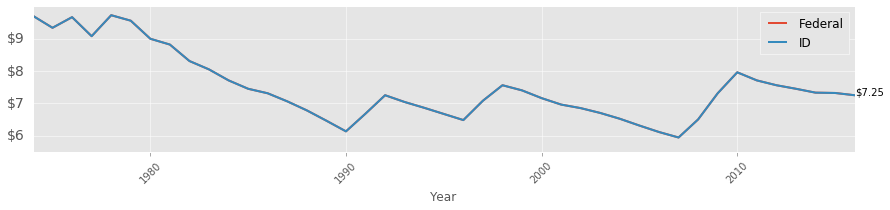

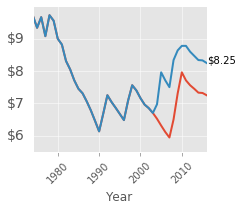

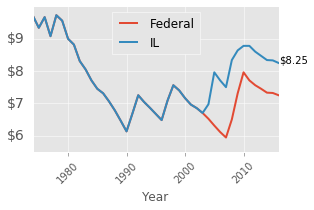

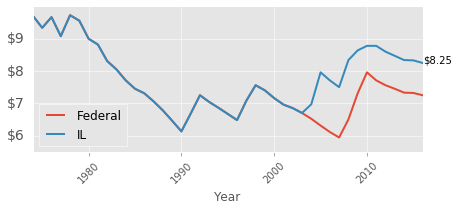

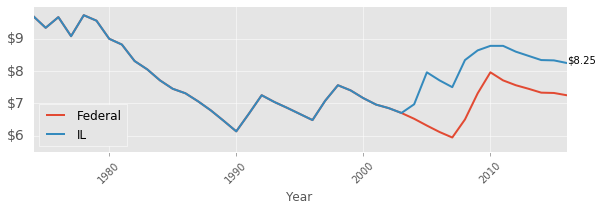

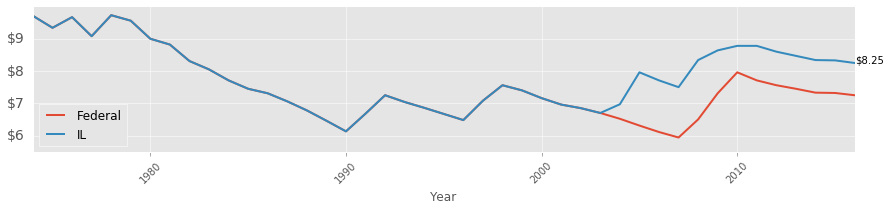

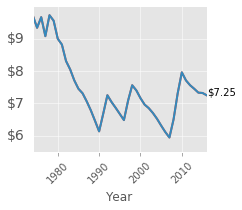

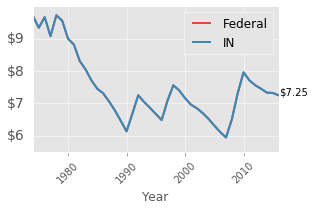

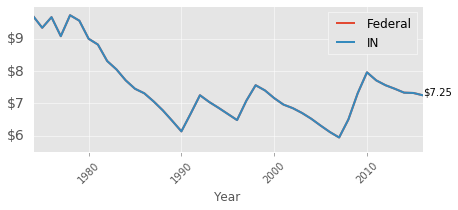

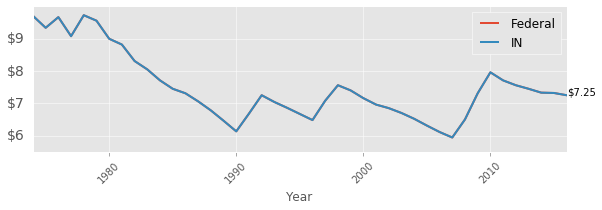

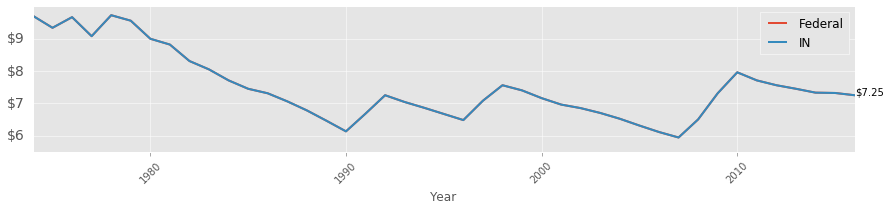

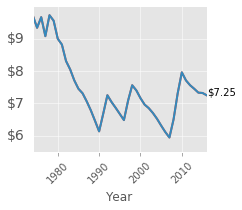

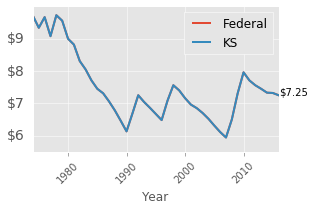

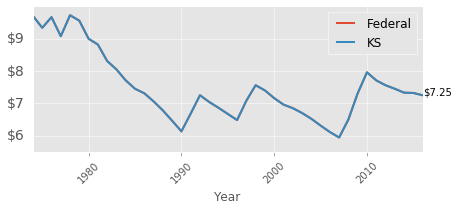

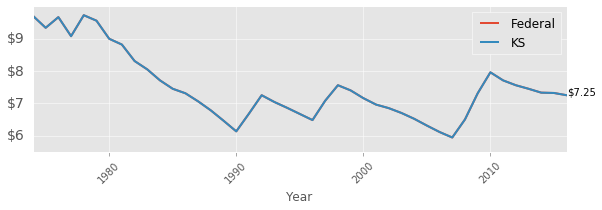

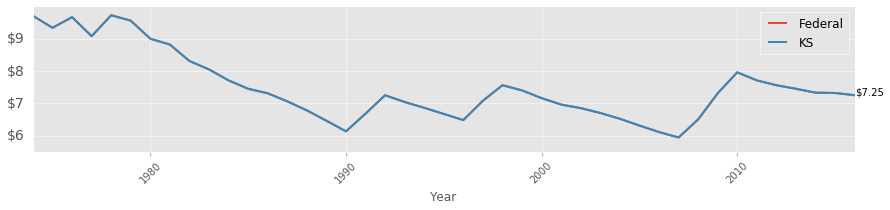

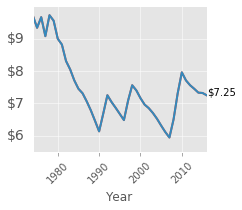

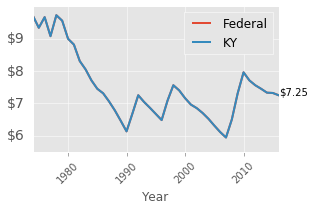

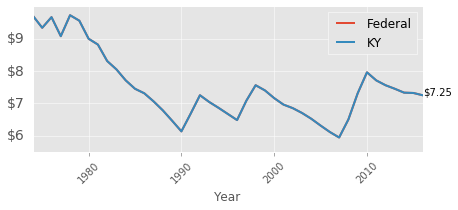

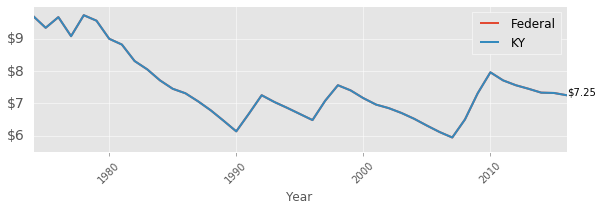

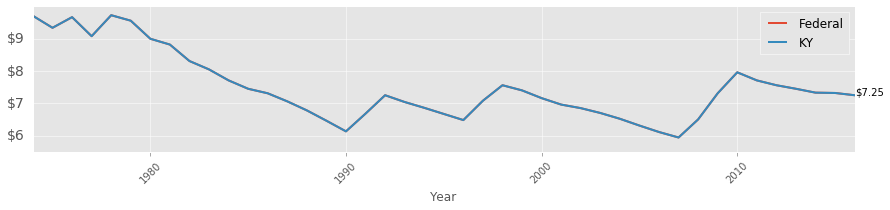

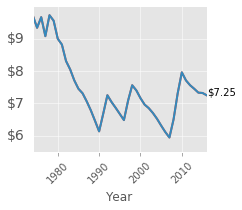

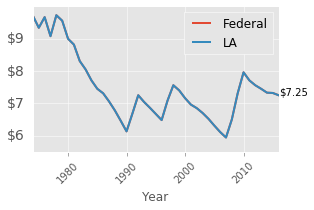

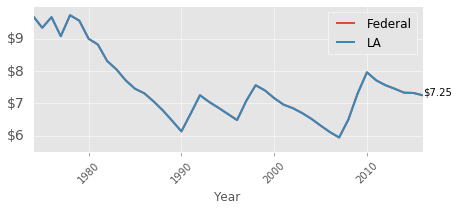

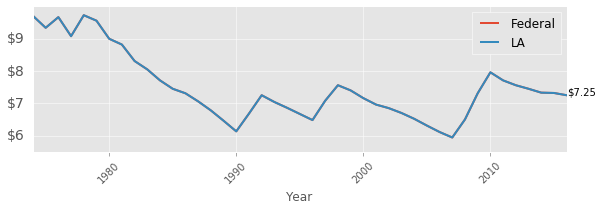

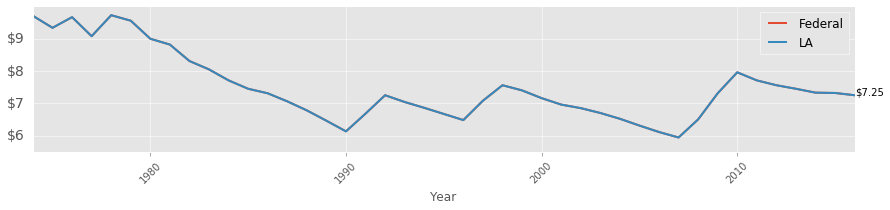

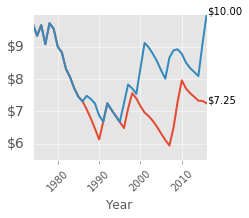

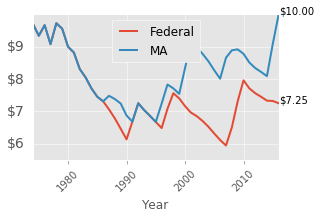

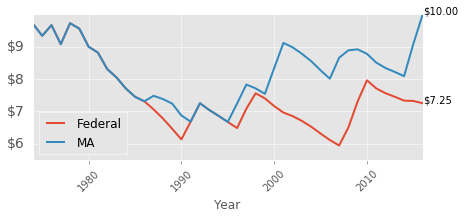

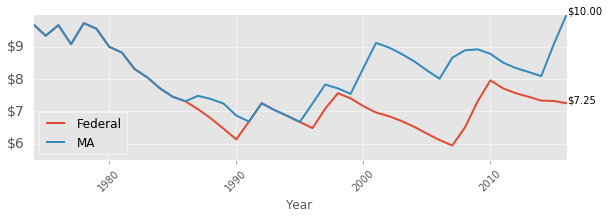

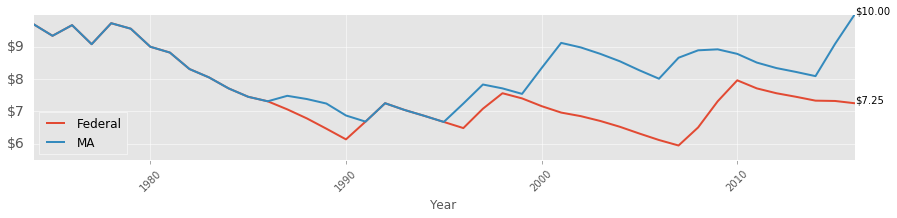

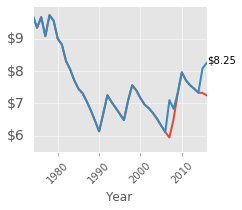

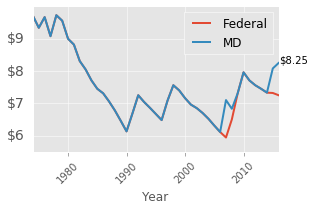

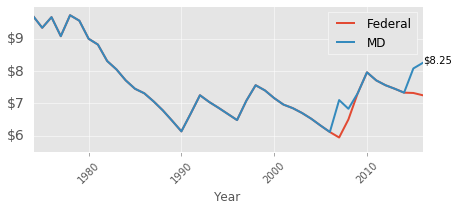

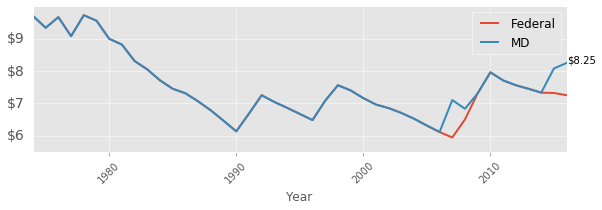

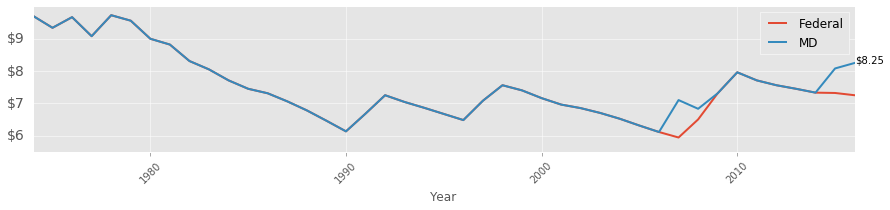

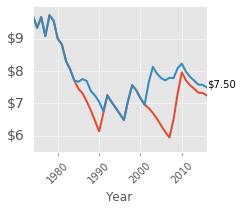

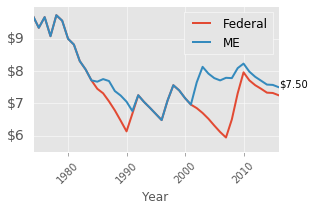

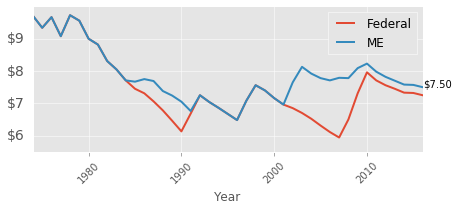

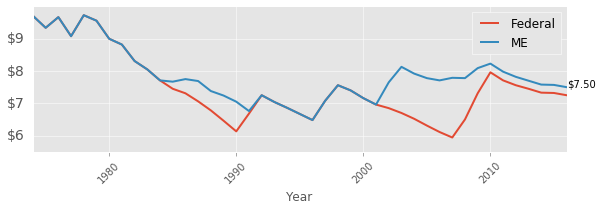

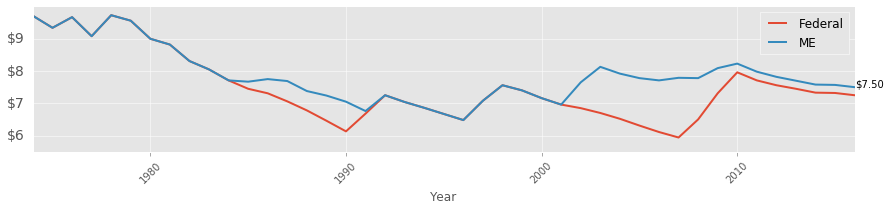

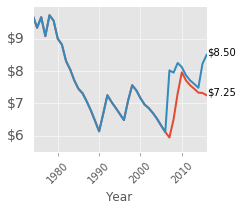

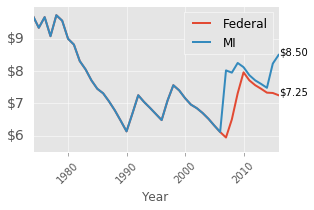

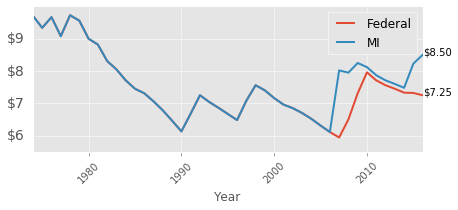

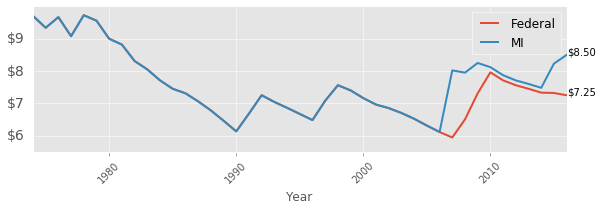

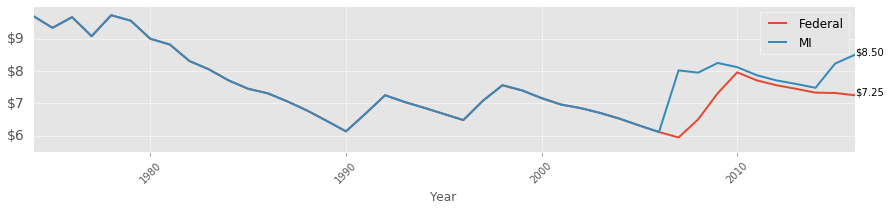

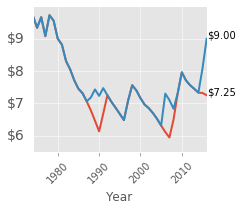

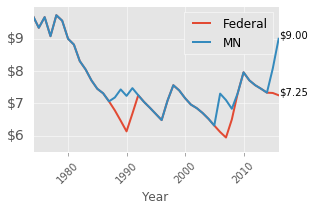

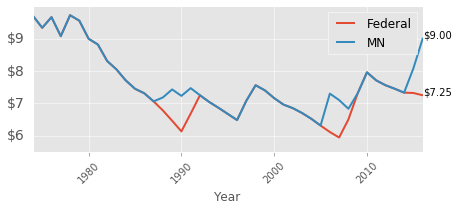

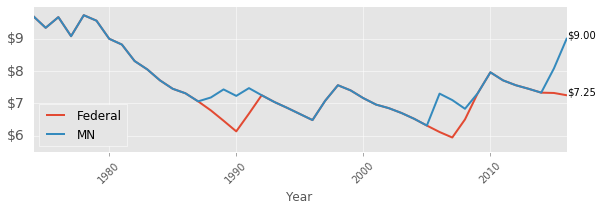

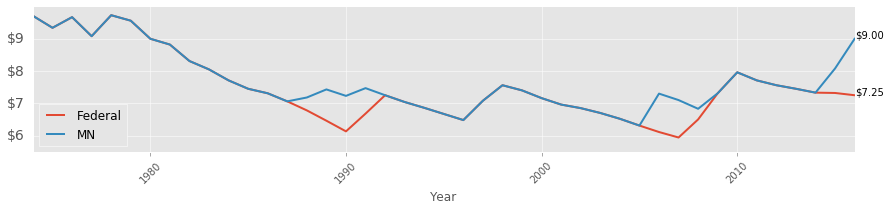

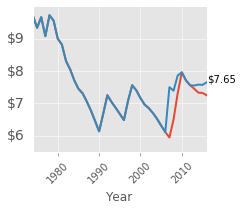

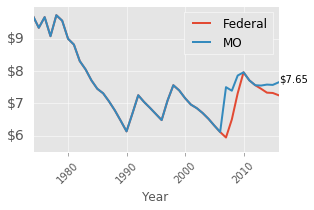

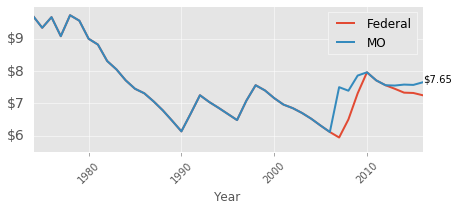

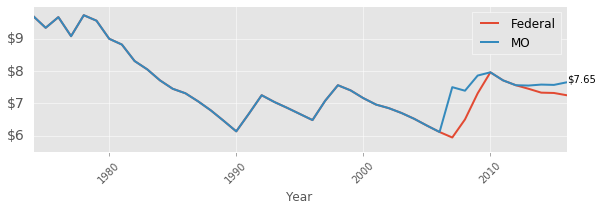

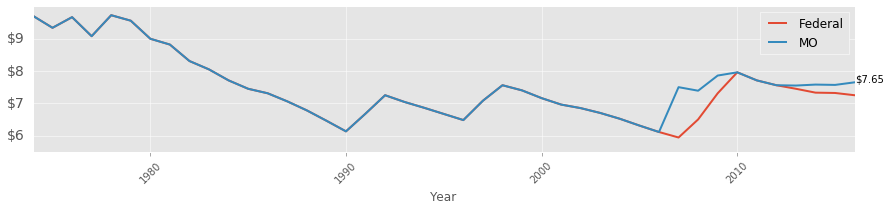

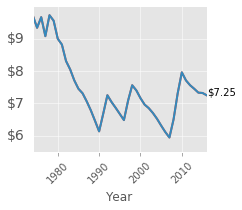

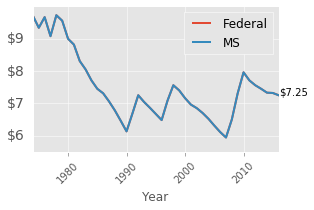

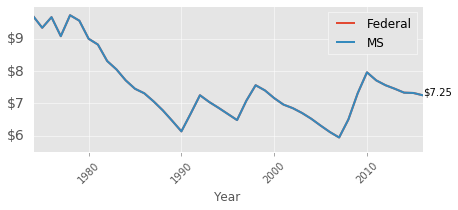

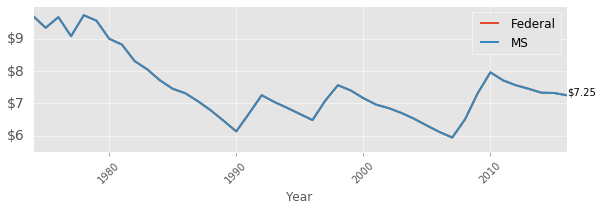

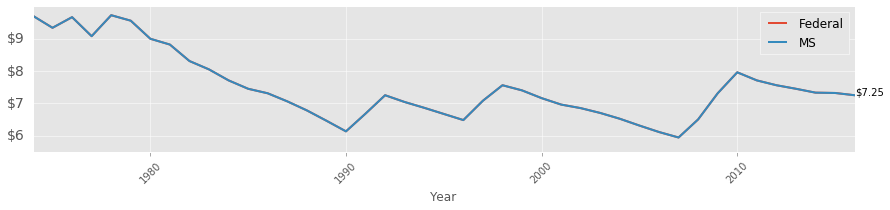

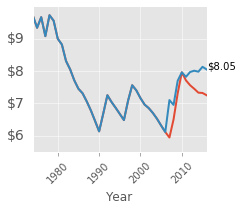

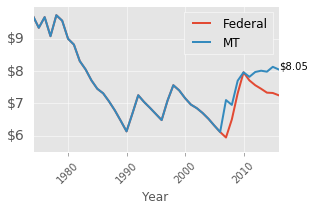

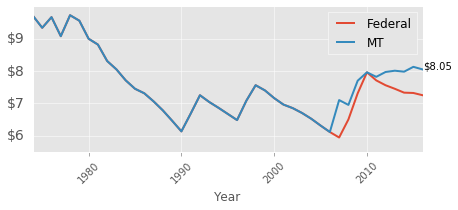

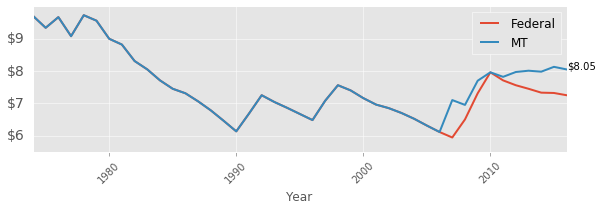

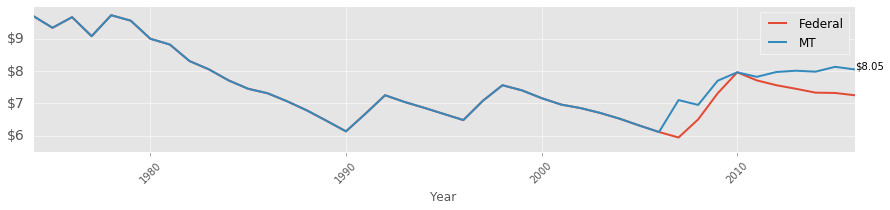

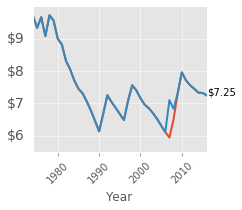

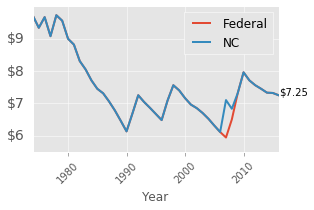

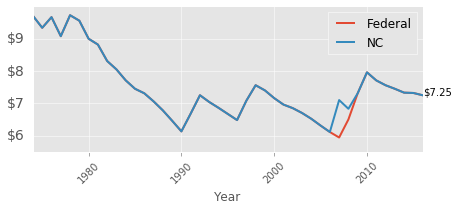

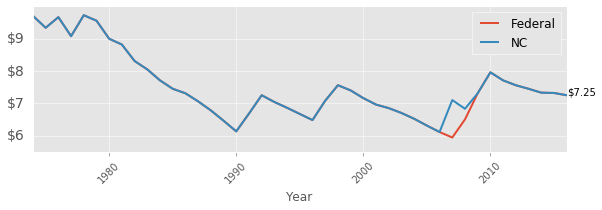

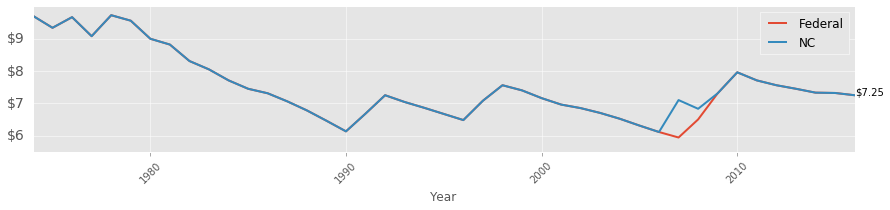

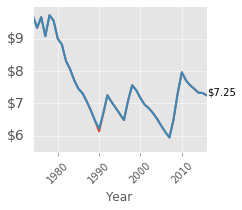

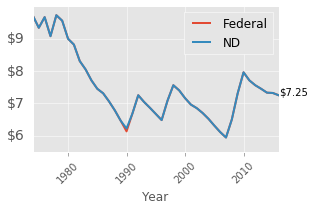

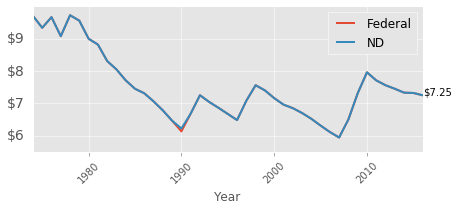

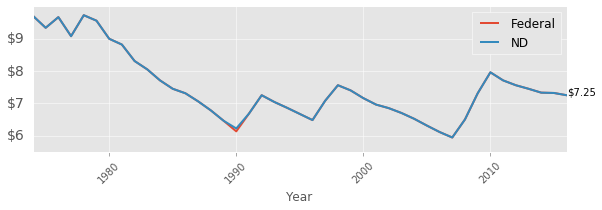

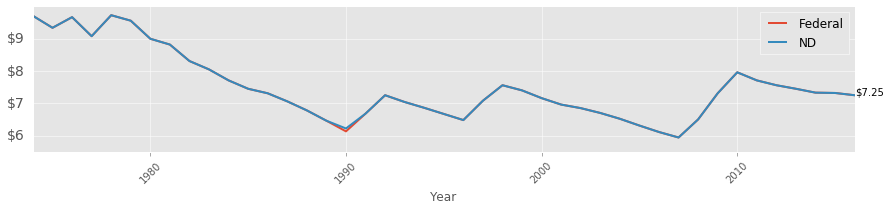

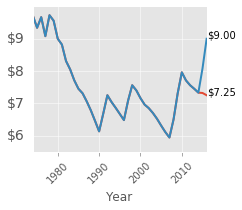

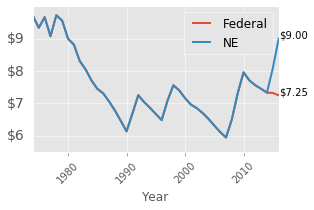

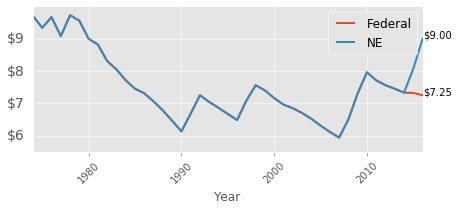

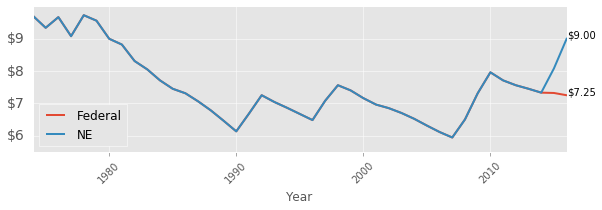

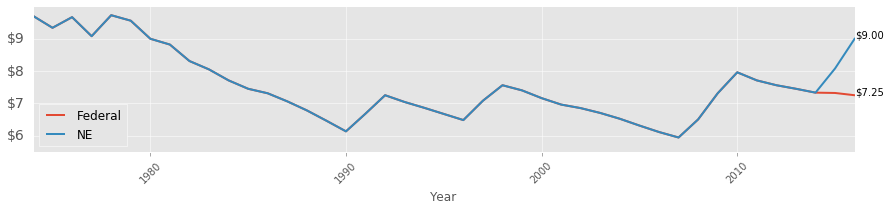

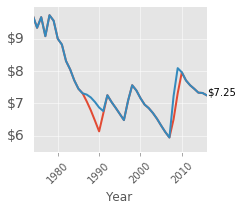

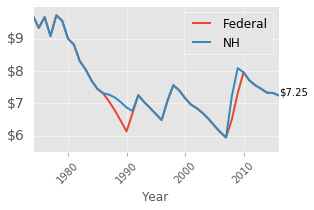

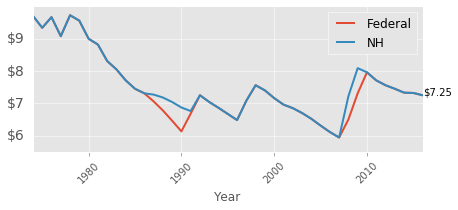

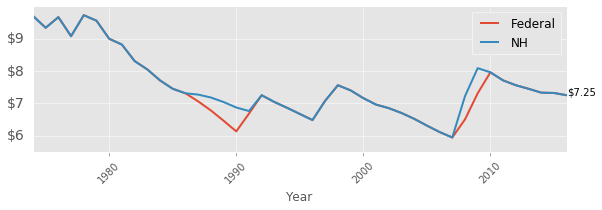

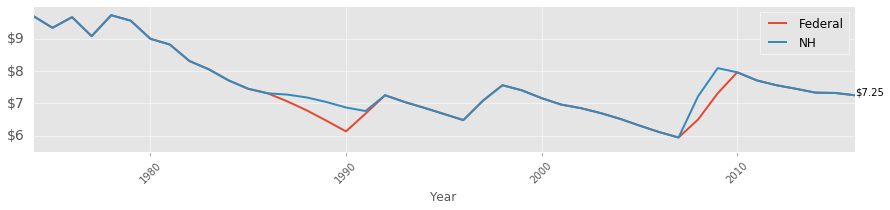

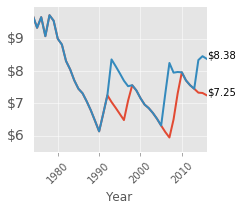

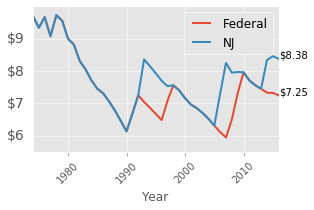

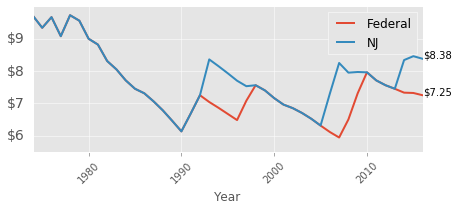

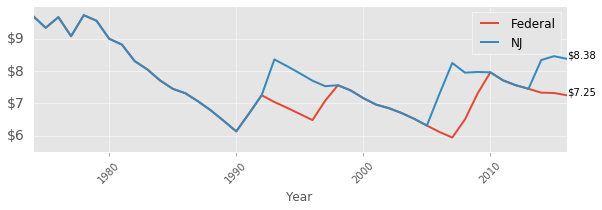

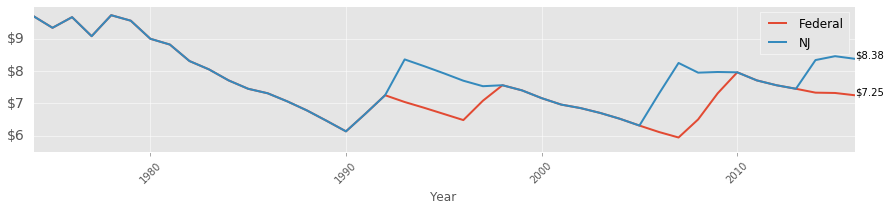

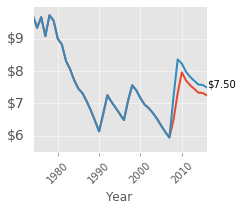

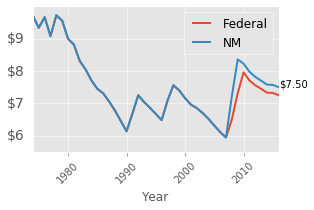

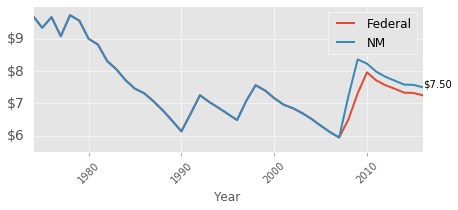

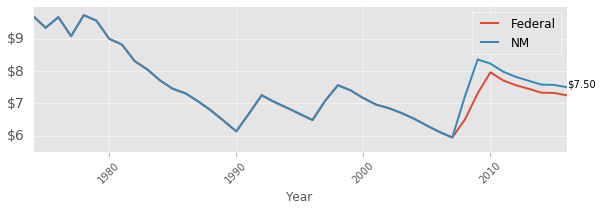

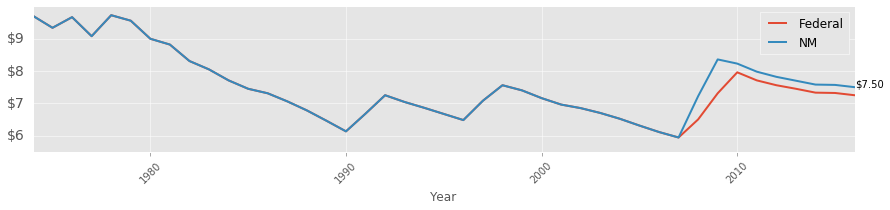

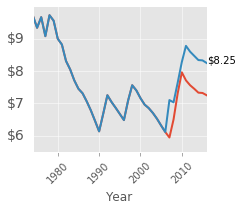

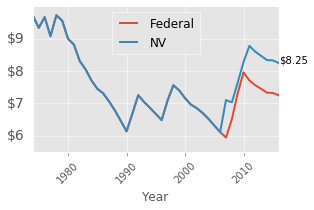

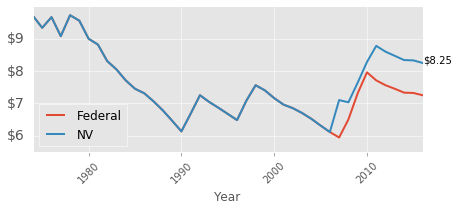

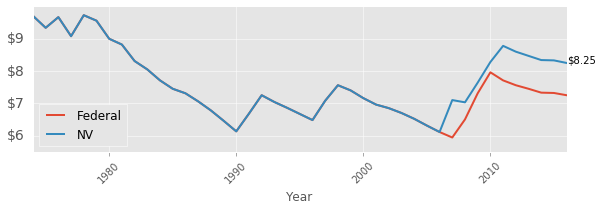

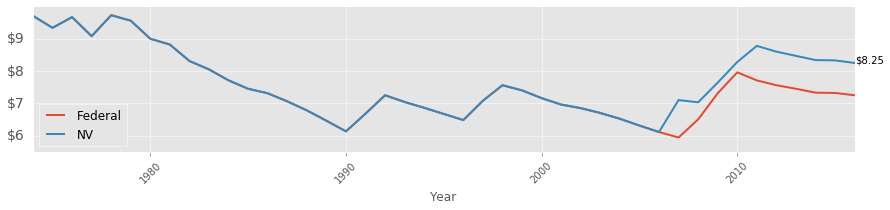

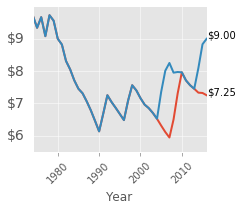

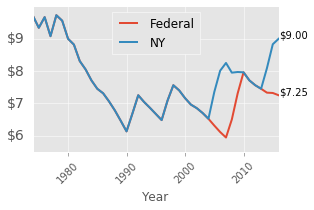

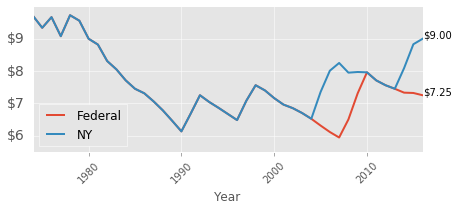

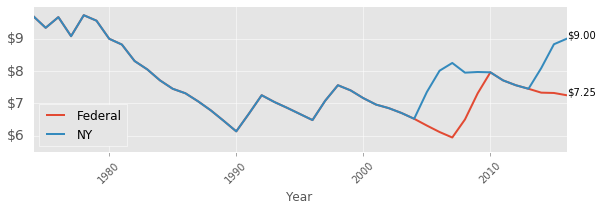

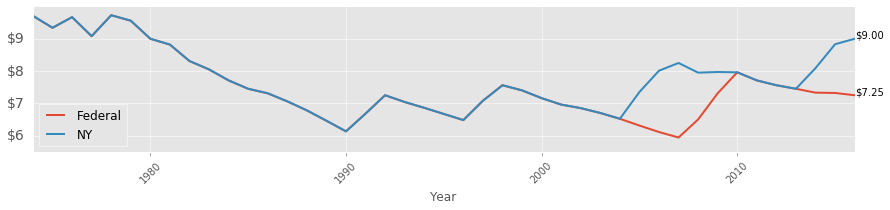

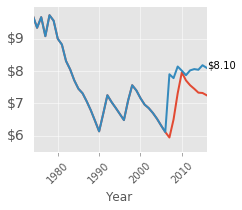

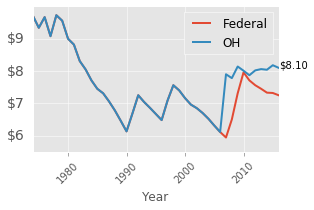

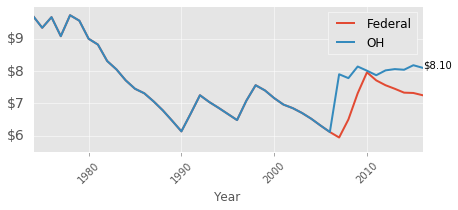

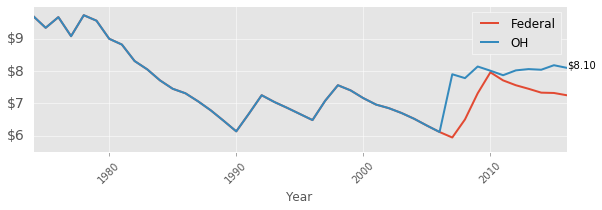

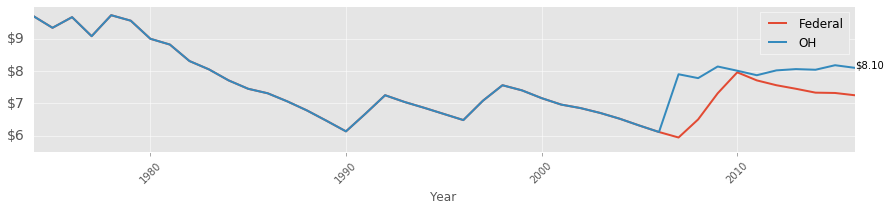

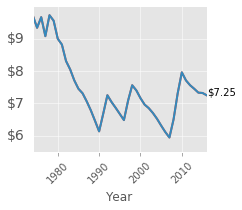

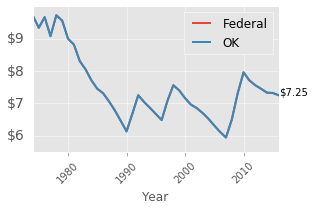

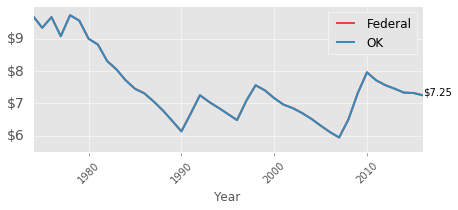

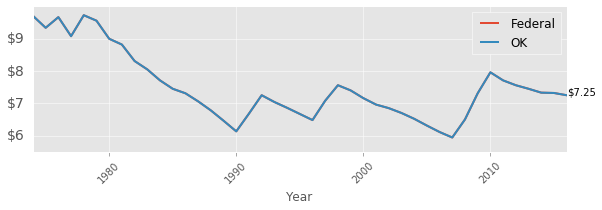

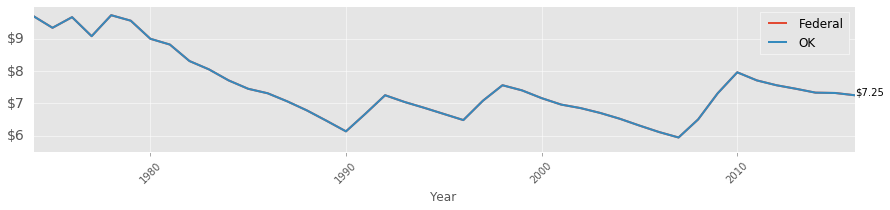

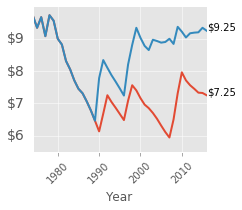

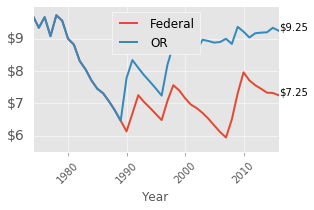

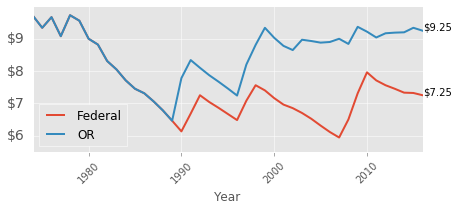

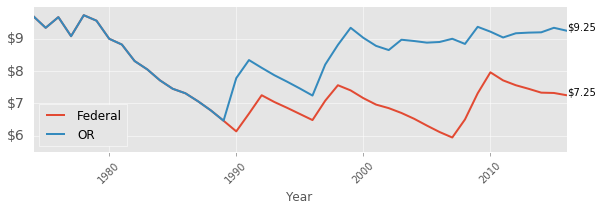

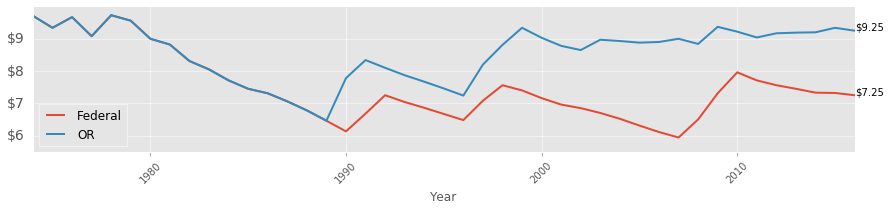

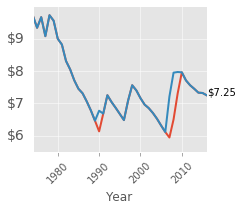

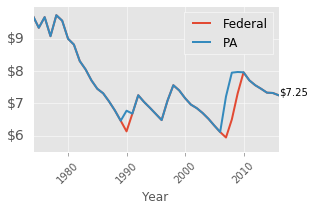

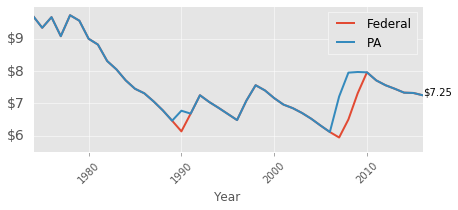

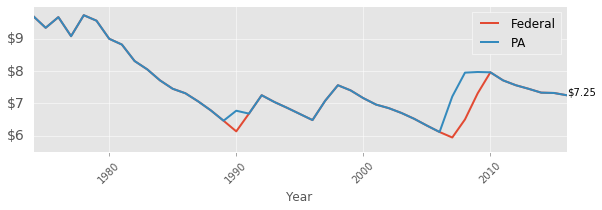

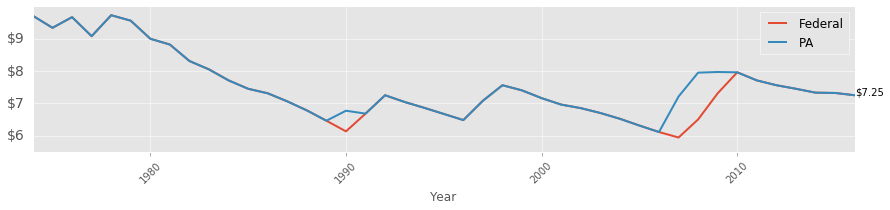

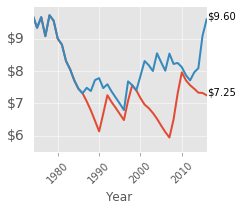

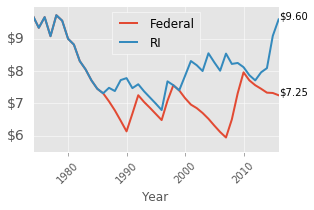

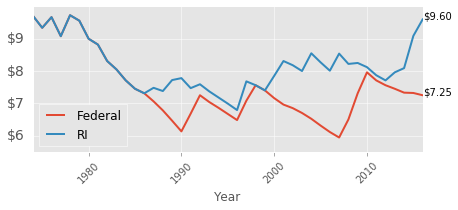

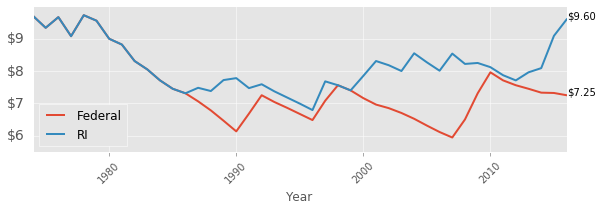

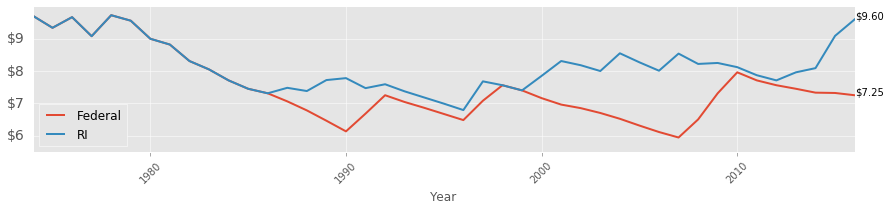

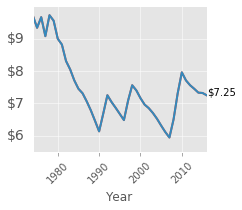

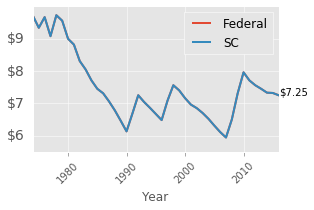

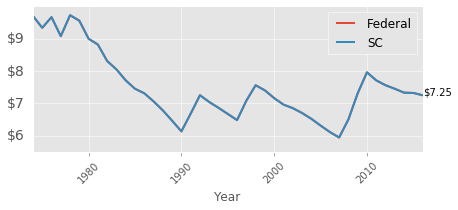

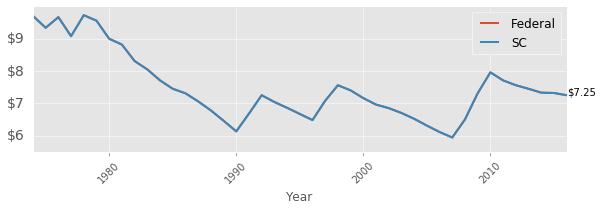

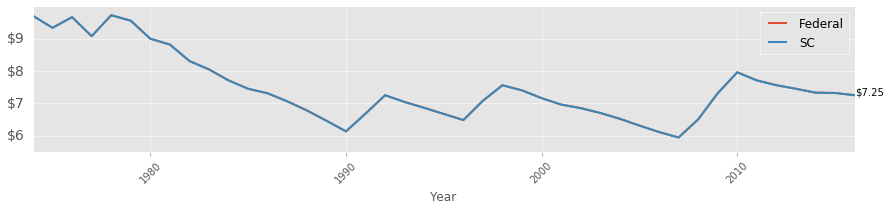

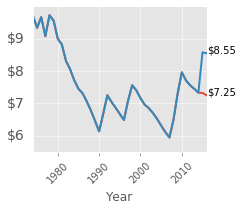

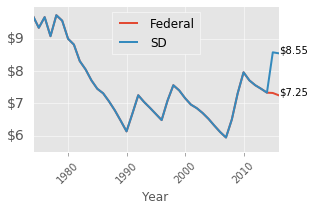

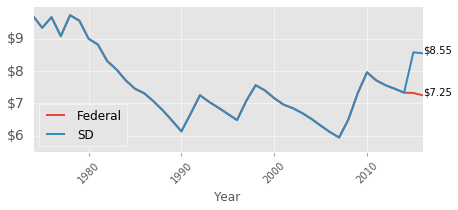

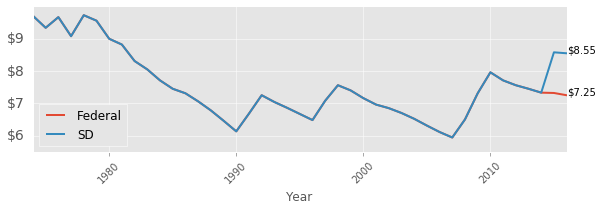

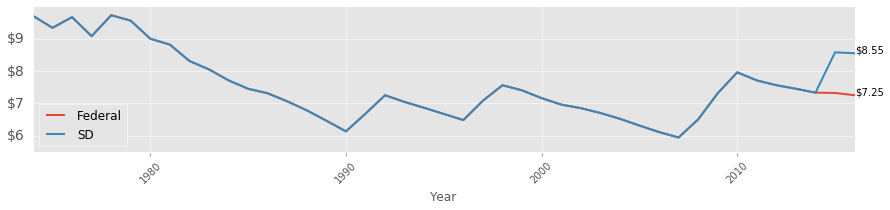

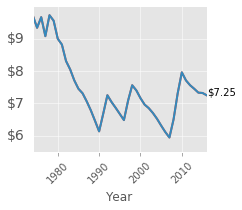

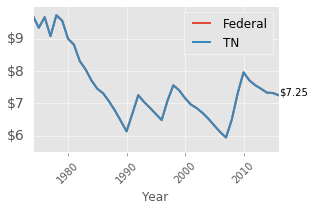

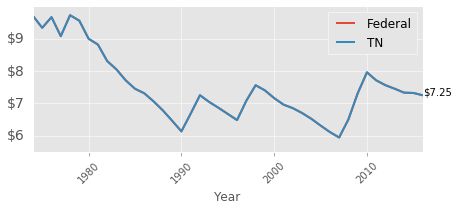

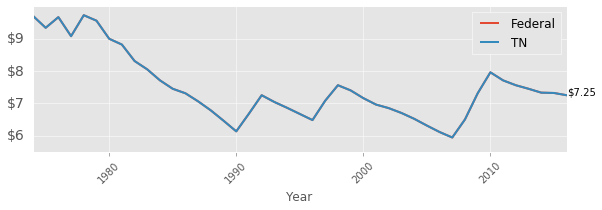

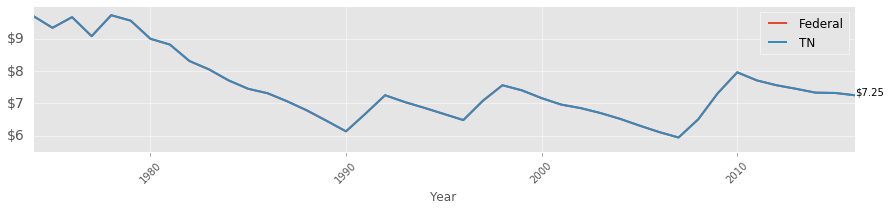

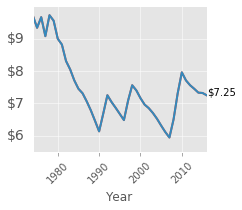

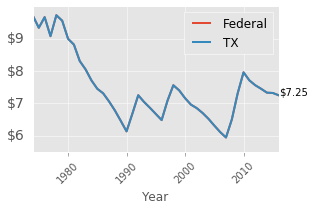

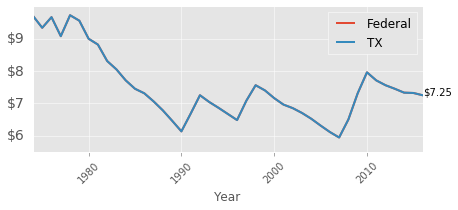

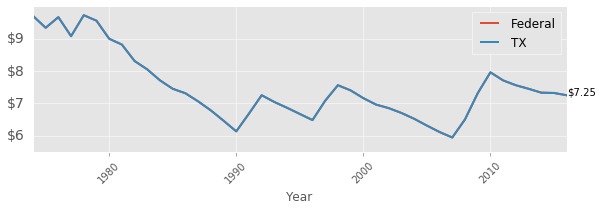

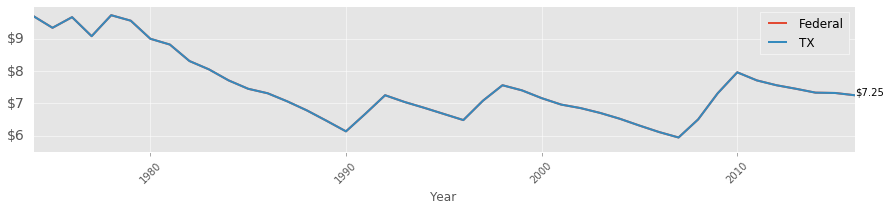

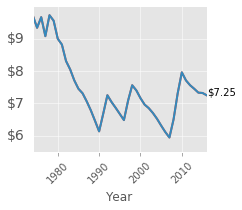

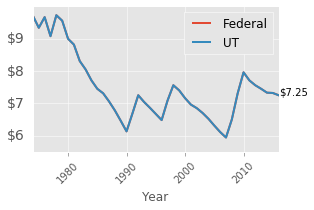

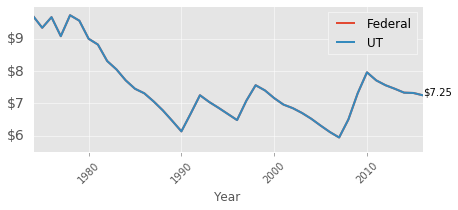

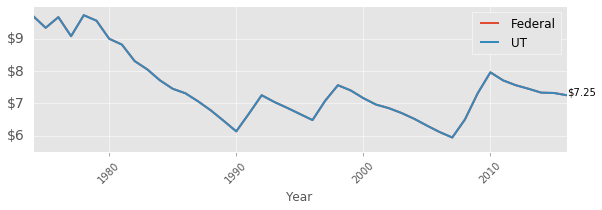

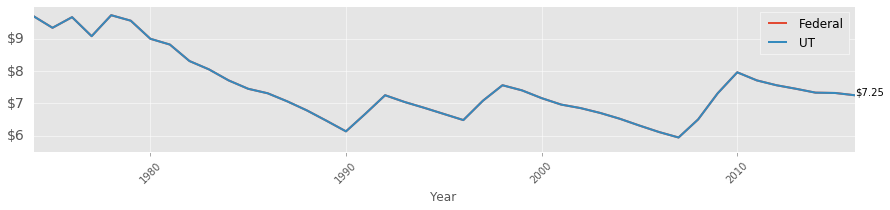

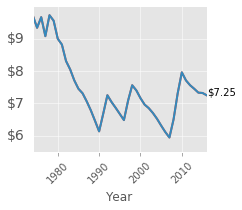

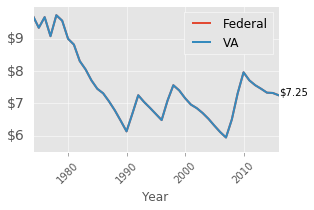

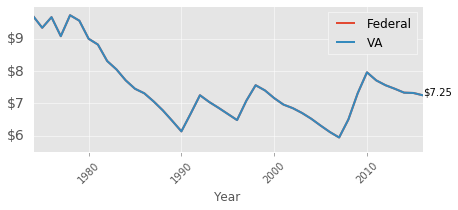

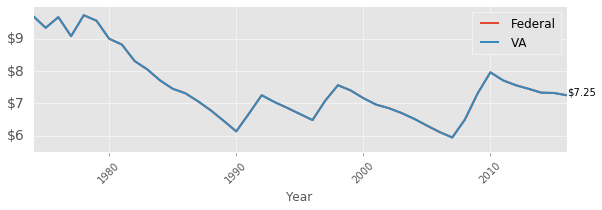

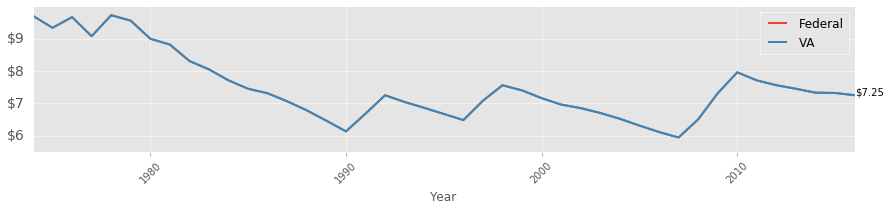

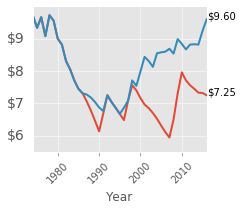

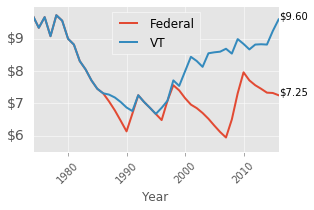

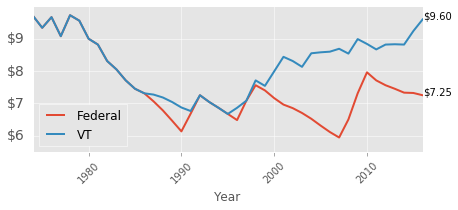

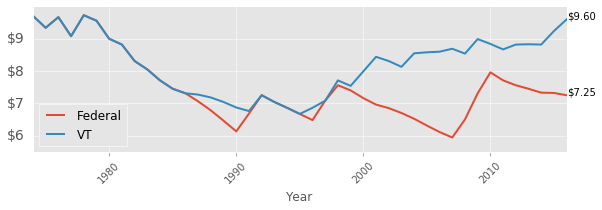

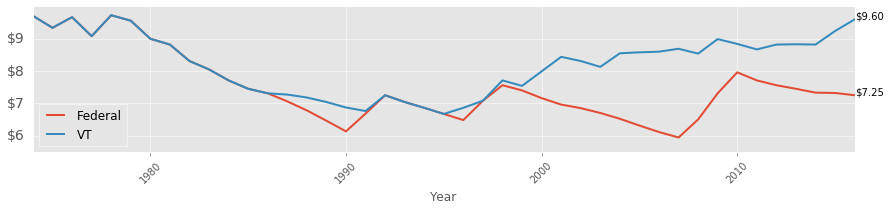

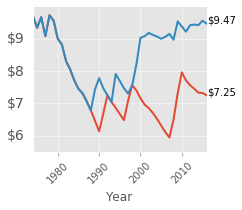

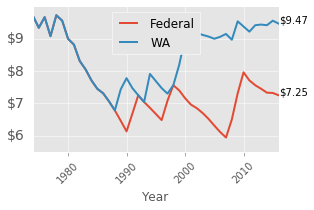

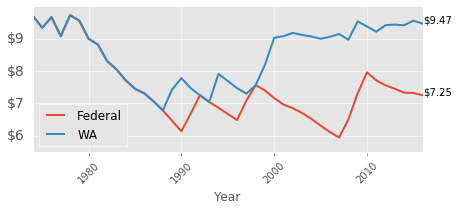

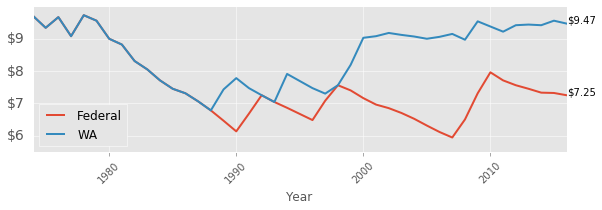

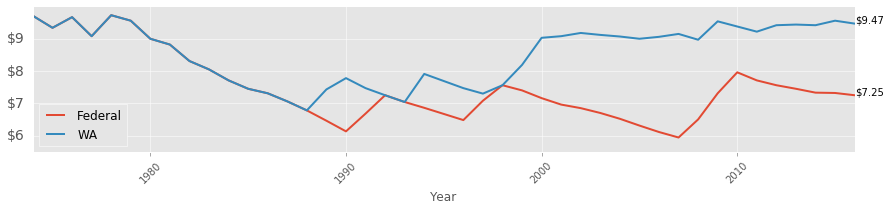

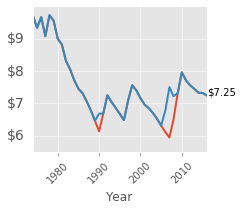

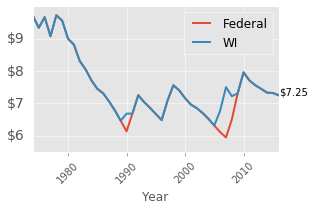

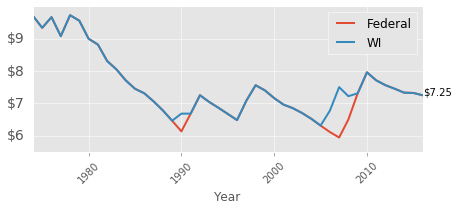

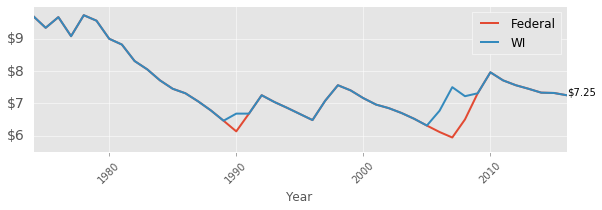

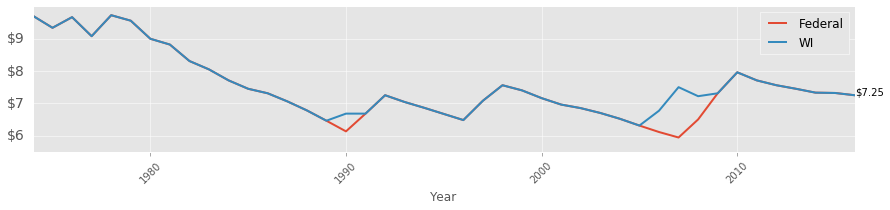

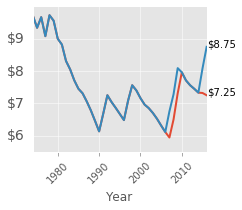

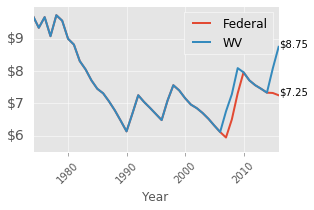

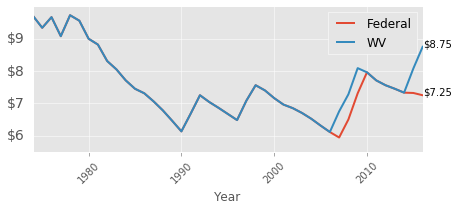

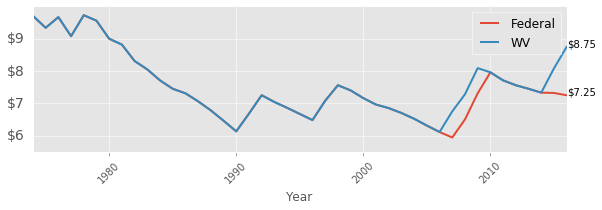

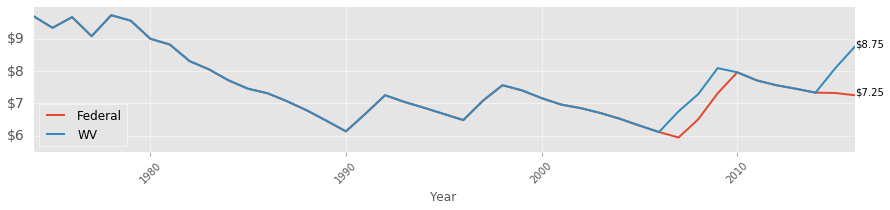

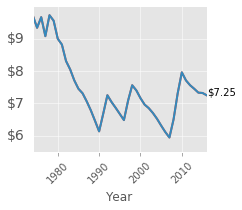

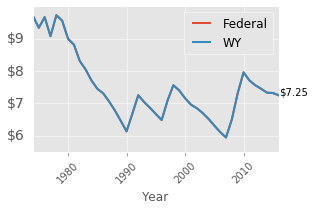

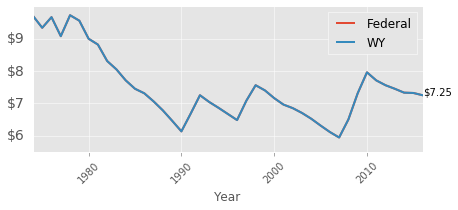

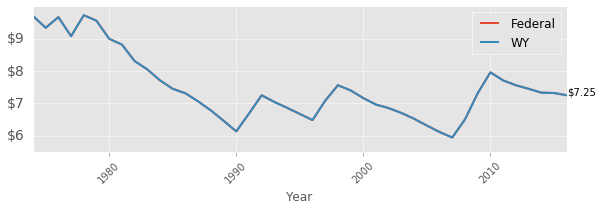

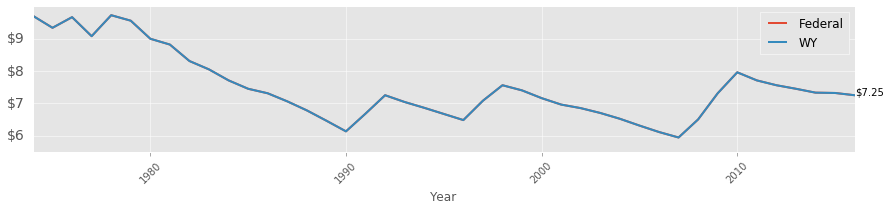

In [10]:
for st in state["State Abbreviation"].unique():
    plot_st(st,width=300,height=300)
    plot_st(st,width=400,height=300,show_legend=True)
    plot_st(st,width=600,height=300,show_legend=True)
    plot_st(st,width=800,height=300,show_legend=True)
    plot_st(st,width=1200,height=300,show_legend=True)

# Combine state rows for data ouput

In [11]:
def df_for_csv(st,drop="Federal"):
    return df_for_plot(st).set_index("Year").transpose().drop(drop).reset_index()
    
df_for_csv("CT",drop="CT")

Year    index  1974  1975  1976  1977  1978  1979  1980  1981  1982  ...   \
0     Federal  9.71  9.34  9.67  9.08  9.73  9.56   9.0  8.82  8.31  ...    

Year  2007  2008  2009  2010  2011  2012  2013  2014  2015  2016  
0     5.94   6.5  7.31  7.96  7.71  7.56  7.45  7.33  7.32  7.25  

[1 rows x 44 columns]

In [12]:
def all_adj():

    frames = []

    for st in state["State Abbreviation"].unique():
        #print st
        fr = df_for_csv(st)
        #print fr
        frames.append(fr)
        
    return pd.concat(frames)
    
all_adj().to_csv("output/for_chart.csv",index=False)
all_adj().to_csv("viz/data/for_chart.csv",index=False)